In [12]:
# %pip install matplotlib
# %pip install scikit-learn
# %pip install seaborn
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,minmax_scale


In [13]:
df = pd.read_csv(r"C:\Users\aliay\OneDrive\Desktop\Supervised Learning Foundation\Machine_Learning\data\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [15]:
df.describe()

,YearsExperience,Salary
count,30.00000,30.000000
mean,5.17600,76003.000000
std,2.33431,27414.429785
min,1.10000,37731.000000
25%,3.37500,56720.750000
50%,5.25000,65237.000000
75%,6.72500,100544.750000
max,8.98000,122391.000000


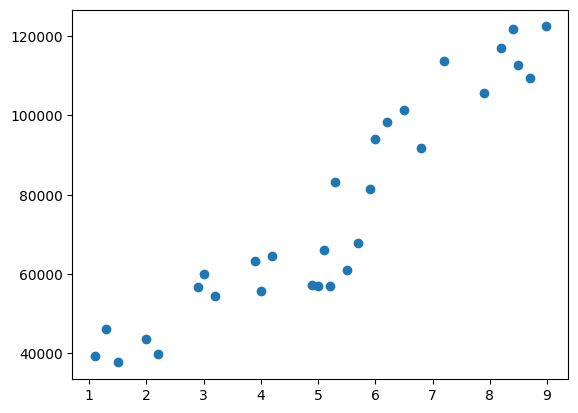

In [16]:
# sns.pairplot(df)
plt.scatter(df['YearsExperience'],df['Salary'])

In [17]:
mymodel = LinearRegression()

In [18]:
# df['YearsExperience'] as an input (x)
# df[salary] as an output (y)
# we did .values.reshape(-1,1) >>> 3shan hya kda vector w fitting aw ay haga msh by7sl 8yr 3la el matrix
# -1 >> unknown number of samples(row)       ,,,,,  1 >>> one column
# Reshape the input feature 'YearsExperience' to a 2D array

# x = df.iloc[:,:-1]
# y = df.iloc[:,1]

# or 

x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'] 

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state = 10)

mymodel.fit(x_train,y_train)

LinearRegression()

In [19]:
print(mymodel.coef_)            # slope
print(mymodel.intercept_)       #y intercept

[11207.55786159]
17113.21762186478


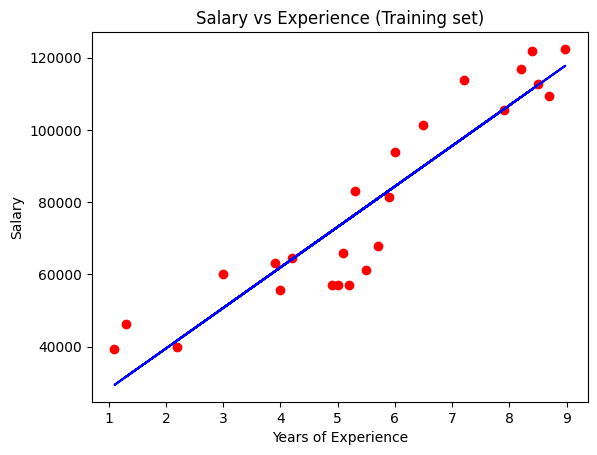

In [21]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, mymodel.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

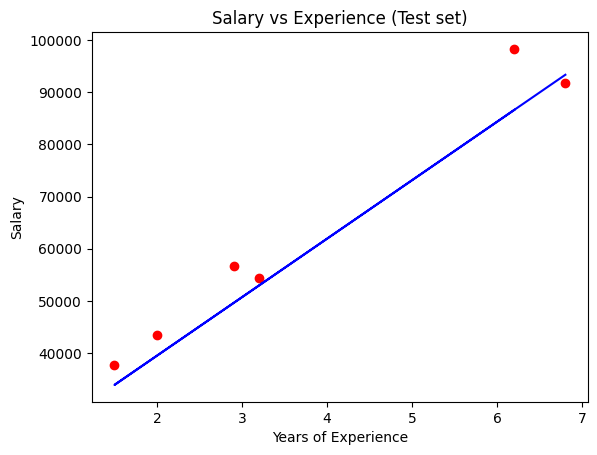

In [22]:
y_pred = mymodel.predict(x_test)
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

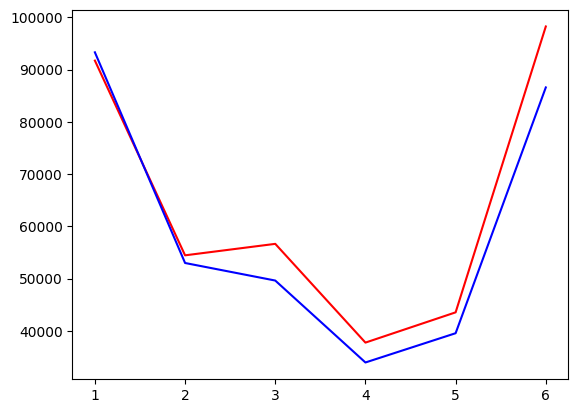

In [27]:
# Plotting the actual and predicted values
# elfar2 byn el actual values and predicted values 
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.show()

In [28]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('mean Absolute error :',mae)

print('r square :',rsq)

mean squared error : 36794586.78512871
mean Absolute error : 4926.184793044314
r square : 0.9309736476792836


In [31]:
# Intecept and coeff of the line
print('Intercept of the model:',mymodel.intercept_)
print('Coefficient of the line:',mymodel.coef_)   # Slope

# 
y_hat = 11207.55786159 * 4.5 +  17113.21762186478 
print(y_hat)

Intercept of the model: 17113.21762186478
Coefficient of the line: [11207.55786159]
67547.22799901979


In [32]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly

array([[  1.      ,   1.1     ,   1.21    ,   1.331   ],
       [  1.      ,   1.3     ,   1.69    ,   2.197   ],
       [  1.      ,   1.5     ,   2.25    ,   3.375   ],
       [  1.      ,   2.      ,   4.      ,   8.      ],
       [  1.      ,   2.2     ,   4.84    ,  10.648   ],
       [  1.      ,   2.9     ,   8.41    ,  24.389   ],
       [  1.      ,   3.      ,   9.      ,  27.      ],
       [  1.      ,   3.2     ,  10.24    ,  32.768   ],
       [  1.      ,   4.2     ,  17.64    ,  74.088   ],
       [  1.      ,   4.9     ,  24.01    , 117.649   ],
       [  1.      ,   3.9     ,  15.21    ,  59.319   ],
       [  1.      ,   4.      ,  16.      ,  64.      ],
       [  1.      ,   5.      ,  25.      , 125.      ],
       [  1.      ,   5.2     ,  27.04    , 140.608   ],
       [  1.      ,   5.5     ,  30.25    , 166.375   ],
       [  1.      ,   5.7     ,  32.49    , 185.193   ],
       [  1.      ,   5.1     ,  26.01    , 132.651   ],
       [  1.      ,   5.3     ,

In [33]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_poly)
x_scale

array([[ 0.        , -1.77597658, -1.29272041, -1.00315128],
       [ 0.        , -1.68883347, -1.27260569, -0.99916594],
       [ 0.        , -1.60169036, -1.24913852, -0.99374478],
       [ 0.        , -1.38383259, -1.17580361, -0.9724605 ],
       [ 0.        , -1.29668948, -1.14060285, -0.96027439],
       [ 0.        , -0.99168859, -0.99099963, -0.89703823],
       [ 0.        , -0.94811704, -0.96627529, -0.8850224 ],
       [ 0.        , -0.86097393, -0.91431227, -0.85847803],
       [ 0.        , -0.42525838, -0.60421037, -0.66832316],
       [ 0.        , -0.12025749, -0.3372713 , -0.46785519],
       [ 0.        , -0.55597304, -0.70604113, -0.73629018],
       [ 0.        , -0.51240149, -0.67293566, -0.71474819],
       [ 0.        , -0.07668594, -0.29578469, -0.43402585],
       [ 0.        ,  0.01045717, -0.21029714, -0.36219775],
       [ 0.        ,  0.14117184, -0.07577997, -0.24361787],
       [ 0.        ,  0.22831495,  0.01808872, -0.15701733],
       [ 0.        , -0.

[ 43297.82350246  42935.53076964  42813.40391284  43497.09778472
  44141.49386151  47893.21236392  48603.50901933  50143.09980239
  59915.36848876  68370.0110264   56657.71161417  57715.68659471
  69658.11253445  72282.78194419  76323.31927331  79072.31859267
  70962.76134637  73616.99880994  81854.5926242   83255.2688621
  94534.45172336  86069.82219225  90307.02155376 100100.97125652
 119033.95330986 109438.53047077 113200.71116056 116773.26840805
 122015.72273659 115605.44446022]


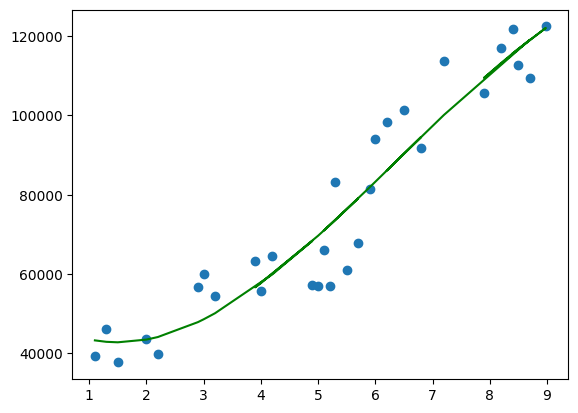

In [37]:
mymodel.fit(x_scale,y)
scaled_preds = mymodel.predict(x_scale)
print(scaled_preds)
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(df['YearsExperience'],scaled_preds,color="green")

In [38]:
# After applying polynomial features
print(mean_squared_error(y,scaled_preds))
print(mean_absolute_error(y,scaled_preds))
print(r2_score(y,scaled_preds))   

70351744.61338013
7097.300608343503
0.9031633639302951


----------------------------------------------------
Mean Absolute Error (Polynomial): 7689.325477370789
Mean Squared Error (Polynomial): 91641292.05149633
R-squared Score (Polynomial): 0.873859070643992


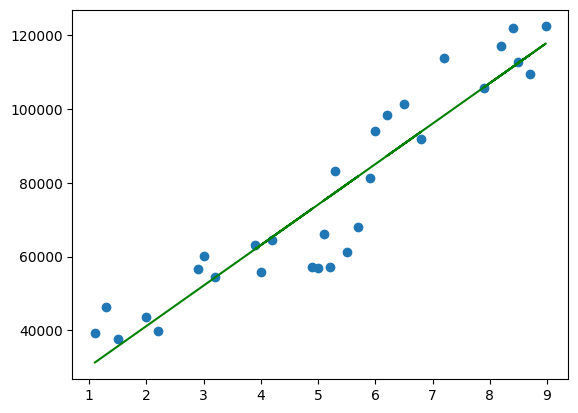

----------------------------------------------------
Mean Absolute Error (Polynomial): 7077.5047466199285
Mean Squared Error (Polynomial): 73984750.31316495
R-squared Score (Polynomial): 0.8981626627718149


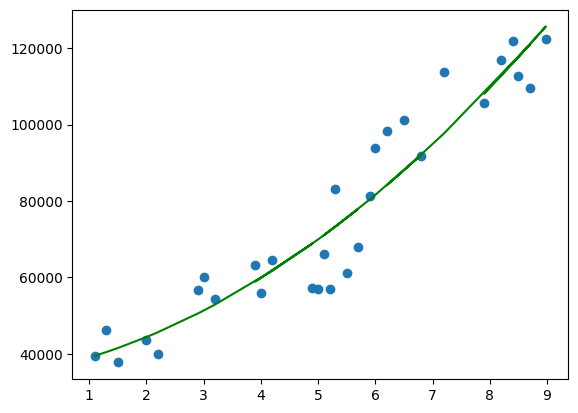

----------------------------------------------------
Mean Absolute Error (Polynomial): 7097.300608343503
Mean Squared Error (Polynomial): 70351744.61338013
R-squared Score (Polynomial): 0.9031633639302951


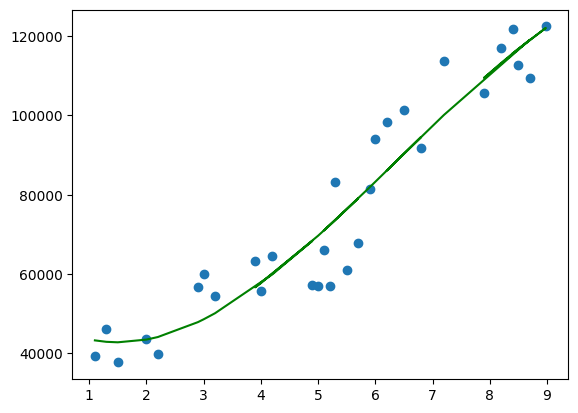

----------------------------------------------------
Mean Absolute Error (Polynomial): 6811.975286576785
Mean Squared Error (Polynomial): 59778076.824945726
R-squared Score (Polynomial): 0.9177176358275672


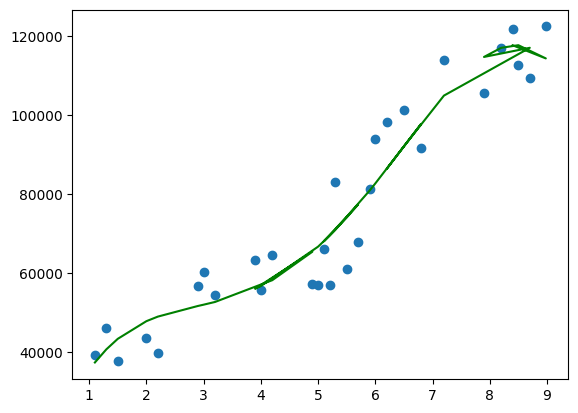

----------------------------------------------------
Mean Absolute Error (Polynomial): 6823.095050051666
Mean Squared Error (Polynomial): 59765610.79494657
R-squared Score (Polynomial): 0.9177347948677146


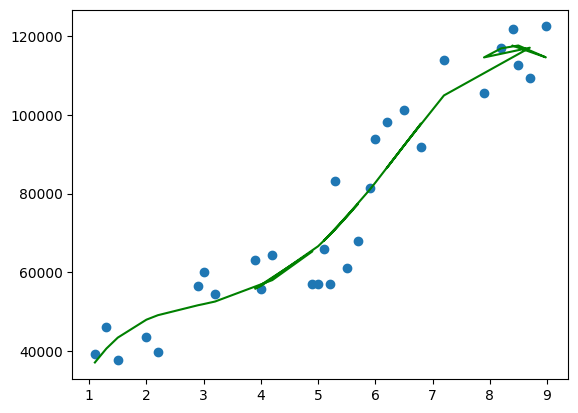

----------------------------------------------------
Mean Absolute Error (Polynomial): 5464.627278833392
Mean Squared Error (Polynomial): 44518855.2465678
R-squared Score (Polynomial): 0.9387214033220742


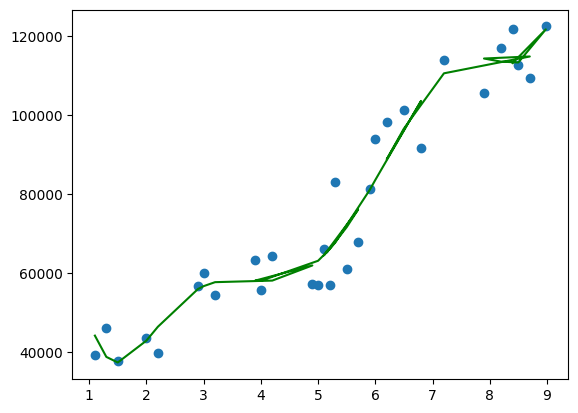

----------------------------------------------------
Mean Absolute Error (Polynomial): 5431.494040756716
Mean Squared Error (Polynomial): 44484979.578965776
R-squared Score (Polynomial): 0.9387680319552832


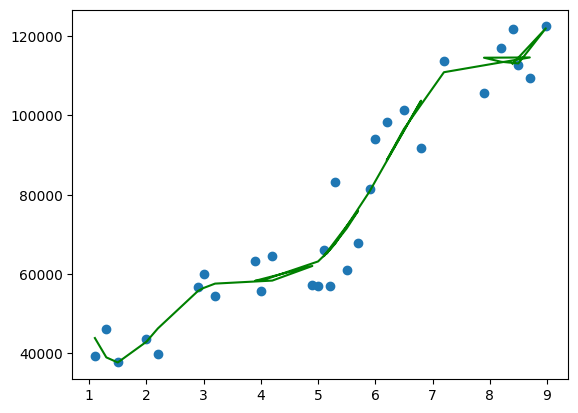

----------------------------------------------------
Mean Absolute Error (Polynomial): 5290.923998875076
Mean Squared Error (Polynomial): 40539421.03990342
R-squared Score (Polynomial): 0.9441989508107942


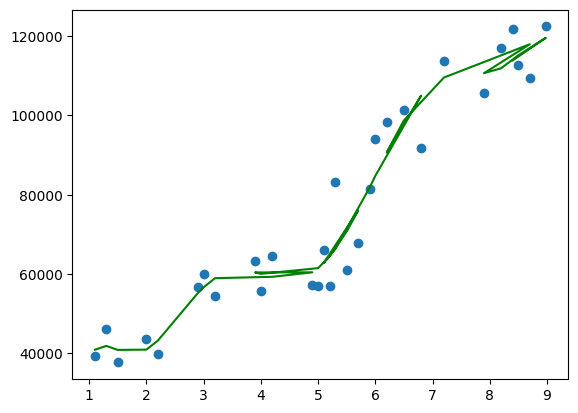

----------------------------------------------------
Mean Absolute Error (Polynomial): 5139.568181934456
Mean Squared Error (Polynomial): 39281528.79459651
R-squared Score (Polynomial): 0.9459303940641648


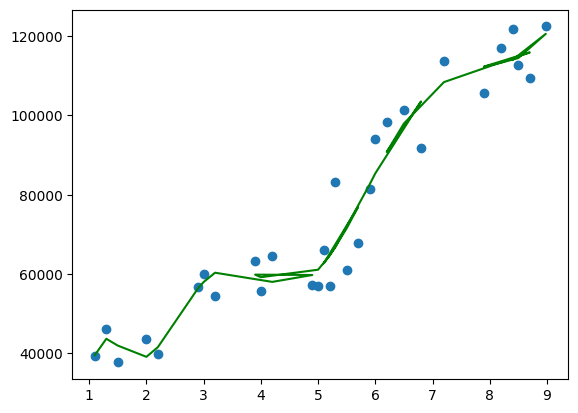

----------------------------------------------------
Mean Absolute Error (Polynomial): 4975.502048746745
Mean Squared Error (Polynomial): 37406576.08871083
R-squared Score (Polynomial): 0.9485111987595644


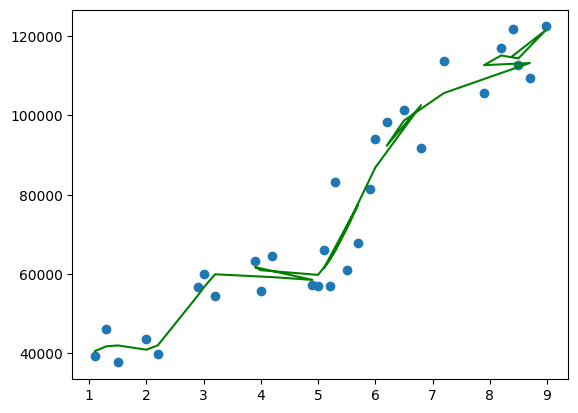

----------------------------------------------------
Mean Absolute Error (Polynomial): 4482.046165847778
Mean Squared Error (Polynomial): 35065902.23762296
R-squared Score (Polynomial): 0.9517330517942162


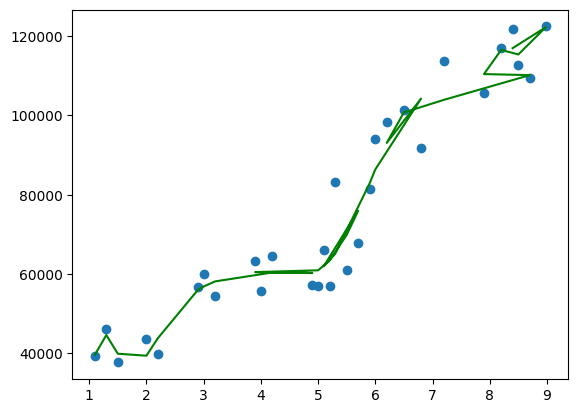

----------------------------------------------------
Mean Absolute Error (Polynomial): 4480.81842070479
Mean Squared Error (Polynomial): 35063390.00255359
R-squared Score (Polynomial): 0.9517365097950727


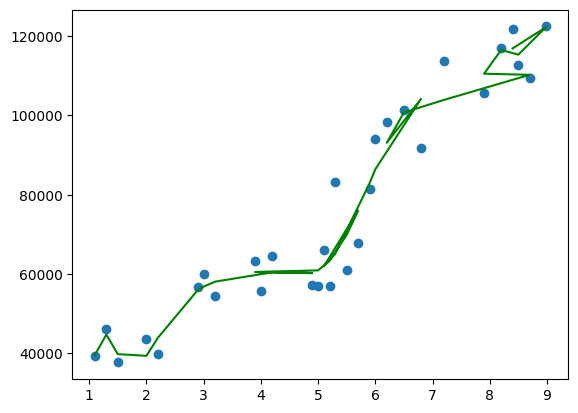

----------------------------------------------------
Mean Absolute Error (Polynomial): 4432.127694952721
Mean Squared Error (Polynomial): 34740279.61234455
R-squared Score (Polynomial): 0.9521812595797293


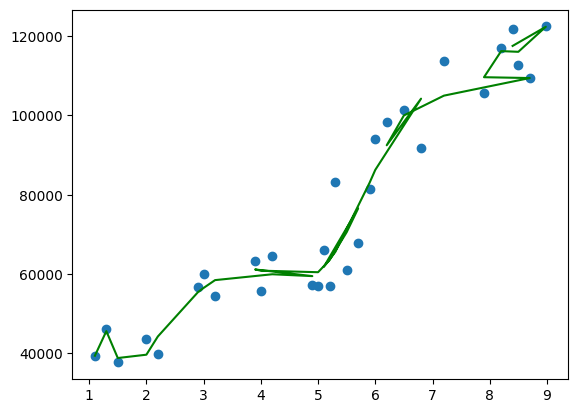

----------------------------------------------------
Mean Absolute Error (Polynomial): 4493.216026668436
Mean Squared Error (Polynomial): 34150867.901150174
R-squared Score (Polynomial): 0.9529925635166226


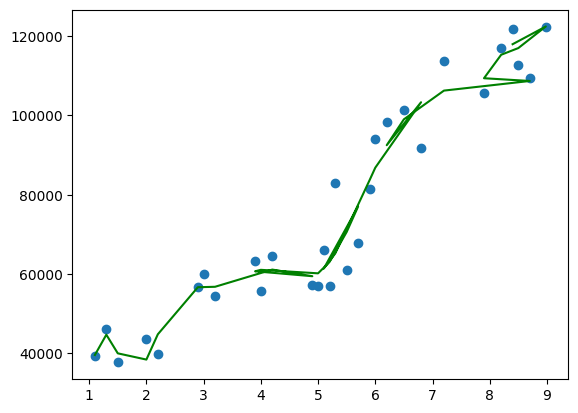

In [39]:
# from this loop we will find when increase the degree of polynomial features the model will overfit in the exicted data points
for i in range(1,15):
    poly = PolynomialFeatures(degree =i )
    x_poly = poly.fit_transform(x)
    print("----------------------------------------------------")
    scl  = StandardScaler()
    x_scl = scl.fit_transform(x_poly)
    lr_poly = LinearRegression()
    lr_poly.fit(x_scl,y)
    preds_poly = lr_poly.predict(x_scl)
    print("Mean Absolute Error (Polynomial):", mean_absolute_error(y, preds_poly))
    print("Mean Squared Error (Polynomial):", mean_squared_error(y, preds_poly))
    print("R-squared Score (Polynomial):", r2_score(y, preds_poly))
    plt.scatter(df['YearsExperience'], df['Salary'])
    plt.plot(df['YearsExperience'], preds_poly, color="g")
    plt.show()